In [1]:
import polars as pl
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 

In [2]:
pl.Config.set_tbl_cols(-1)
pl.Config.set_tbl_rows(-1)

polars.config.Config

# ETL & DATA WANGLING

In [3]:
df = pl.scan_parquet('dados_parquet/*/*.parquet').collect()

In [4]:
df.head()

ANO_NASCIMENTO,PESO,ALTURA,MUN_NASCIMENTO,UF_NASCIMENTO,PAIS_NASCIMENTO,ESTADO_CIVIL,SEXO,ESCOLARIDADE,VINCULACAO_ANO,DISPENSA,ZONA_RESIDENCIAL,MUN_RESIDENCIA,UF_RESIDENCIA,PAIS_RESIDENCIA
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""1989""","""95""","""181""","""DESCALVADO""","""SP""","""BRASIL""","""Solteiro""","""M""","""Ensino Médio Completo""","""2007""","""Sem dispensa""","""Urbana""","""PIRASSUNUNGA""","""SP""","""BRASIL"""
"""1989""","""64""","""173""","""CATANDUVA""","""SP""","""BRASIL""","""Casado""","""M""","""Ensino Superior Completo""","""2007""","""Sem dispensa""","""Urbana""","""SAO PAULO""","""SP""","""BRASIL"""
"""1989""","""82""","""171""","""CATANDUVA""","""SP""","""BRASIL""","""Solteiro""","""M""","""Ensino Médio Completo""","""2007""","""Sem dispensa""","""Urbana""","""CATANDUVA""","""SP""","""BRASIL"""
"""1989""",null,null,"""SANTO ANDRE""","""SP""","""BRASIL""","""Solteiro""","""M""","""Ensino Médio Completo""","""2007""","""Sem dispensa""","""Urbana""","""PIRAJUI""","""SP""","""BRASIL"""
"""1989""",null,null,"""PIRAJUI""","""SP""","""BRASIL""","""Solteiro""","""M""","""3ª Série do Ensino Médio""","""2007""","""Sem dispensa""","""Urbana""","""PIRAJUI""","""SP""","""BRASIL"""


In [5]:
n_rows = df.shape[0]
n_rows

26569408

In [6]:
for col in df.columns:
    qtd_nulos = df.select(
        pl.col(col).null_count()
    ).item()
    if qtd_nulos > 0:
        print(f'Coluna {col} tem {qtd_nulos} valores nulos.')

Coluna PESO tem 18598039 valores nulos.
Coluna ALTURA tem 18588096 valores nulos.
Coluna DISPENSA tem 474630 valores nulos.


In [7]:
df.group_by('VINCULACAO_ANO').agg(
    ((pl.col(['PESO', 'ALTURA', 'DISPENSA']).null_count() / pl.len()) * 100).round(2).name.suffix('_qtd_nulos')
)

VINCULACAO_ANO,PESO_qtd_nulos,ALTURA_qtd_nulos,DISPENSA_qtd_nulos
str,f64,f64,f64
"""2012""",81.24,81.24,0.0
"""2011""",79.71,79.71,0.0
"""2016""",79.34,79.35,0.0
"""2019""",0.0,0.0,0.0
"""2009""",78.75,78.74,0.0
"""2008""",81.6,81.47,0.0
"""2024""",0.0,0.0,0.0
"""2017""",74.84,74.82,32.7
"""2020""",68.1,68.12,0.0


In [8]:
df = df.drop(['PESO', 'ALTURA'])

In [9]:
df.select('DISPENSA').unique().to_series().to_list()

[None, 'Com dispensa', 'Sem dispensa', 'null']

In [10]:
for col in df.columns:
    df = df.with_columns(
        pl.col(col).replace('null', None)
    )

In [11]:
for col in df.columns:
    qtd_nulos = df.select(
        pl.col(col).null_count()
    ).item()
    if qtd_nulos > 0:
        print(f'Coluna {col} tem {qtd_nulos} valores nulos.')

Coluna DISPENSA tem 474635 valores nulos.


In [12]:
df.select('DISPENSA').unique().to_series().to_list()

['Com dispensa', None, 'Sem dispensa']

In [13]:
df = df.filter(
    pl.col('DISPENSA').is_not_null()
).with_columns(
    convocacao = pl.when(
        pl.col('DISPENSA') == 'Sem dispensa'
    ).then(True).otherwise(False)
).drop('DISPENSA')

In [14]:
df.head()

ANO_NASCIMENTO,MUN_NASCIMENTO,UF_NASCIMENTO,PAIS_NASCIMENTO,ESTADO_CIVIL,SEXO,ESCOLARIDADE,VINCULACAO_ANO,ZONA_RESIDENCIAL,MUN_RESIDENCIA,UF_RESIDENCIA,PAIS_RESIDENCIA,convocacao
str,str,str,str,str,str,str,str,str,str,str,str,bool
"""1989""","""DESCALVADO""","""SP""","""BRASIL""","""Solteiro""","""M""","""Ensino Médio Completo""","""2007""","""Urbana""","""PIRASSUNUNGA""","""SP""","""BRASIL""",true
"""1989""","""CATANDUVA""","""SP""","""BRASIL""","""Casado""","""M""","""Ensino Superior Completo""","""2007""","""Urbana""","""SAO PAULO""","""SP""","""BRASIL""",true
"""1989""","""CATANDUVA""","""SP""","""BRASIL""","""Solteiro""","""M""","""Ensino Médio Completo""","""2007""","""Urbana""","""CATANDUVA""","""SP""","""BRASIL""",true
"""1989""","""SANTO ANDRE""","""SP""","""BRASIL""","""Solteiro""","""M""","""Ensino Médio Completo""","""2007""","""Urbana""","""PIRAJUI""","""SP""","""BRASIL""",true
"""1989""","""PIRAJUI""","""SP""","""BRASIL""","""Solteiro""","""M""","""3ª Série do Ensino Médio""","""2007""","""Urbana""","""PIRAJUI""","""SP""","""BRASIL""",true


In [15]:
df = df.with_columns(
    pl.col('ANO_NASCIMENTO').cast(pl.Int16),
    pl.col('UF_NASCIMENTO').cast(pl.Categorical),
    pl.col('VINCULACAO_ANO').cast(pl.Int16),
    pl.col('UF_RESIDENCIA').cast(pl.Categorical),
).drop(['MUN_NASCIMENTO', 'MUN_RESIDENCIA'])

In [16]:
n_rows = df.shape[0]
n_rows

26094773

In [17]:
df.with_columns(
    nasceu_brasil = pl.col('PAIS_NASCIMENTO') == 'BRASIL',
    reside_brasil = pl.col('PAIS_RESIDENCIA') == 'BRASIL'
).select(
    pl.col(['nasceu_brasil', 'reside_brasil']).value_counts()
)

nasceu_brasil,reside_brasil
struct[2],struct[2]
"{false,76630}","{true,25979512}"
"{true,26018143}","{false,115261}"


In [18]:
df = df.filter(
    pl.col('PAIS_NASCIMENTO') == 'BRASIL',
    pl.col('PAIS_RESIDENCIA') == 'BRASIL'
).drop(['PAIS_NASCIMENTO', 'PAIS_RESIDENCIA'])

In [19]:
df.head()

ANO_NASCIMENTO,UF_NASCIMENTO,ESTADO_CIVIL,SEXO,ESCOLARIDADE,VINCULACAO_ANO,ZONA_RESIDENCIAL,UF_RESIDENCIA,convocacao
i16,cat,str,str,str,i16,str,cat,bool
1989,"""SP""","""Solteiro""","""M""","""Ensino Médio Completo""",2007,"""Urbana""","""SP""",true
1989,"""SP""","""Casado""","""M""","""Ensino Superior Completo""",2007,"""Urbana""","""SP""",true
1989,"""SP""","""Solteiro""","""M""","""Ensino Médio Completo""",2007,"""Urbana""","""SP""",true
1989,"""SP""","""Solteiro""","""M""","""Ensino Médio Completo""",2007,"""Urbana""","""SP""",true
1989,"""SP""","""Solteiro""","""M""","""3ª Série do Ensino Médio""",2007,"""Urbana""","""SP""",true


In [20]:
print(df.select('ESTADO_CIVIL').unique().to_series().to_list())

['ViÃºvo', 'Separado Judicialmente', 'Solteiro', 'Viúvo', 'Casado', 'Divorciado', 'Outros', 'Desquitado']


In [21]:
df = df.with_columns(
    pl.col('ESTADO_CIVIL').replace({
        'ViÃºvo': 'Viúvo',
        'Separado Judicialmente': 'Divorciado',
        'Desquitado': 'Divorciado',
    })
)

In [22]:
print(df.select('ESTADO_CIVIL').unique().to_series().to_list())

['Casado', 'Divorciado', 'Solteiro', 'Viúvo', 'Outros']


In [23]:
df.select(
    pl.col('ESTADO_CIVIL').value_counts()
).unnest('ESTADO_CIVIL').group_by('ESTADO_CIVIL').agg(
    ((pl.col('count').sum() / n_rows) * 100).round(2)
)

ESTADO_CIVIL,count
str,f64
"""Viúvo""",0.01
"""Solteiro""",96.95
"""Outros""",0.86
"""Divorciado""",0.18
"""Casado""",1.39


In [24]:
df = df.filter(
    pl.col('ESTADO_CIVIL') == 'Solteiro'
).drop('ESTADO_CIVIL')

In [25]:
n_rows = df.shape[0]
n_rows

25298928

In [26]:
df.head()

ANO_NASCIMENTO,UF_NASCIMENTO,SEXO,ESCOLARIDADE,VINCULACAO_ANO,ZONA_RESIDENCIAL,UF_RESIDENCIA,convocacao
i16,cat,str,str,i16,str,cat,bool
1989,"""SP""","""M""","""Ensino Médio Completo""",2007,"""Urbana""","""SP""",true
1989,"""SP""","""M""","""Ensino Médio Completo""",2007,"""Urbana""","""SP""",true
1989,"""SP""","""M""","""Ensino Médio Completo""",2007,"""Urbana""","""SP""",true
1989,"""SP""","""M""","""3ª Série do Ensino Médio""",2007,"""Urbana""","""SP""",true
1989,"""SP""","""M""","""2ª Série do Ensino Médio""",2007,"""Urbana""","""SP""",true


In [27]:
print(df.select('SEXO').unique().to_series().to_list())

['M', 'F']


In [28]:
df.select(
    pl.col('SEXO').value_counts()
).unnest('SEXO').group_by('SEXO').agg(
    ((pl.col('count').sum() / n_rows) * 100).round(2)
)

SEXO,count
str,f64
"""M""",99.95
"""F""",0.05


In [29]:
df = df.filter(
    pl.col('SEXO') != 'F'
).drop('SEXO')

In [30]:
n_rows = df.shape[0]
n_rows

25287523

In [31]:
df.head()

ANO_NASCIMENTO,UF_NASCIMENTO,ESCOLARIDADE,VINCULACAO_ANO,ZONA_RESIDENCIAL,UF_RESIDENCIA,convocacao
i16,cat,str,i16,str,cat,bool
1989,"""SP""","""Ensino Médio Completo""",2007,"""Urbana""","""SP""",true
1989,"""SP""","""Ensino Médio Completo""",2007,"""Urbana""","""SP""",true
1989,"""SP""","""Ensino Médio Completo""",2007,"""Urbana""","""SP""",true
1989,"""SP""","""3ª Série do Ensino Médio""",2007,"""Urbana""","""SP""",true
1989,"""SP""","""2ª Série do Ensino Médio""",2007,"""Urbana""","""SP""",true


In [32]:
print(df.select('ZONA_RESIDENCIAL').unique().to_series().to_list())

['Rural', 'Urbana']


In [33]:
df.select(
    pl.col('ZONA_RESIDENCIAL').value_counts()
).unnest('ZONA_RESIDENCIAL').group_by('ZONA_RESIDENCIAL').agg(
    ((pl.col('count').sum() / n_rows) * 100).round(2)
)

ZONA_RESIDENCIAL,count
str,f64
"""Rural""",12.11
"""Urbana""",87.89


In [34]:
df = df.with_columns(
    pl.col('ZONA_RESIDENCIAL').cast(pl.Categorical)
)

In [35]:
df.head()

ANO_NASCIMENTO,UF_NASCIMENTO,ESCOLARIDADE,VINCULACAO_ANO,ZONA_RESIDENCIAL,UF_RESIDENCIA,convocacao
i16,cat,str,i16,cat,cat,bool
1989,"""SP""","""Ensino Médio Completo""",2007,"""Urbana""","""SP""",true
1989,"""SP""","""Ensino Médio Completo""",2007,"""Urbana""","""SP""",true
1989,"""SP""","""Ensino Médio Completo""",2007,"""Urbana""","""SP""",true
1989,"""SP""","""3ª Série do Ensino Médio""",2007,"""Urbana""","""SP""",true
1989,"""SP""","""2ª Série do Ensino Médio""",2007,"""Urbana""","""SP""",true


In [36]:
print(df.select('ESCOLARIDADE').unique().to_series().to_list())

['5° Semestre do Ensino Superior', '4Â° Ano - Ensino Fundamental', '2° Semestre - Ensino Superior', '7Â° Ano - Ensino Fundamental', '9° Ano - Ensino Fundamental', 'Ensino Médio Completo', 'Doutorado', '1ª Série do Ensino Fundamental', '2° Ano - Ensino Fundamental', '4ª Série do Ensino Médio', '4° Semestre - Ensino Superior', 'Ensino Fundamental Completo', '1° Semestre do Ensino Superior', '3ª Série do Ensino Fundamental', '3ª Série do Ensino Médio', '6ª Série do Ensino Fundamental', '7° Ano - Ensino Fundamental', '1° Ano - Ensino Médio', '3° Semestre - Ensino Superior', '8° Ano - Ensino Fundamental', '8Â° Semestre - Ensino Superior', '5° Ano - Ensino Fundamental', '5Â° Ano - Ensino Fundamental', '1° Ano - Ensino Fundamental', 'Ensino Superior Completo', '1Â° Ano - Ensino Fundamental', '10Â° Semestre - Ensino Superior', '4ª Série do Ensino Fundamental', '3° Semestre do Ensino Superior', '5ª Série do Ensino Fundamental', '10° Semestre - Ensino Superior', '3° Ano - Ensino Fundamental', '4

In [37]:
df = df.with_columns(
    pl.col('ESCOLARIDADE').str.replace_many({
        'Â°': '°',
        'Ã©': 'é',        
        'Ã³s': 'ó',
        'Ã§Ã£o': 'ção',
        'Ã§â\x95\x9eo': 'ção'
    }, ascii_case_insensitive=True)
)

In [38]:
print(df.select('ESCOLARIDADE').unique().to_series().to_list())

['1° Semestre do Ensino Superior', '5° Semestre do Ensino Superior', '1° Ano - Ensino Fundamental', 'Ensino Fundamental Completo', '6ª Série do Ensino Fundamental', '2ª Série do Ensino Fundamental', '9° Ano - Ensino Fundamental', 'Pó-Graduação', '1ª Série do Ensino Fundamental', '10° Semestre - Ensino Superior', '1ª Série do Ensino Médio', '3° Semestre do Ensino Superior', 'Doutorado', '5° Ano - Ensino Fundamental', '8ª Série do Ensino Fundamental', '4° Semestre - Ensino Superior', '6° Semestre do Ensino Superior', 'Pós-Graduação', '3ª Série do Ensino Fundamental', '5° Semestre - Ensino Superior', 'Mestrado', '8° Ano - Ensino Fundamental', '6° Semestre - Ensino Superior', '8° Semestre do Ensino Superior', 'Pós-Doutorado', 'Ensino Médio Completo', '9° Semestre - Ensino Superior', '3° Semestre - Ensino Superior', '7° Semestre - Ensino Superior', '4° Semestre do Ensino Superior', '4ª Série do Ensino Fundamental', '4° Ano - Ensino Fundamental', '8° Semestre - Ensino Superior', '2° Semestre

In [39]:
ensino_fundamental = df.select('ESCOLARIDADE').filter(
    pl.col('ESCOLARIDADE').str.contains('Ensino Fundamental')
).unique().to_series().to_list()

In [40]:
ensino_medio = df.select('ESCOLARIDADE').filter(
    pl.col('ESCOLARIDADE').str.contains('Ensino Médio')
).unique().to_series().to_list()

In [41]:
graduacao = df.select('ESCOLARIDADE').filter(
    pl.col('ESCOLARIDADE').str.contains('Ensino Superior')
).unique().to_series().to_list()

In [42]:
ordem_escolaridade = [
    'Analfabeto',
    'Alfabetizado',
    'Ensino Fundamental',
    'Ensino Médio',
    'Graduação',
    'Pós-Graduação'
]

In [43]:
df = df.with_columns(
    nivel_educacional = pl.when(pl.col('ESCOLARIDADE') == 'Analfabeto')
        .then(pl.lit('Analfabeto'))
        .when(pl.col('ESCOLARIDADE') == 'Alfabetizado')
        .then(pl.lit('Alfabetizado'))
        .when(pl.col('ESCOLARIDADE').is_in(ensino_fundamental))
        .then(pl.lit('Ensino Fundamental'))
        .when(pl.col('ESCOLARIDADE').is_in(ensino_medio))
        .then(pl.lit('Ensino Médio'))
        .when(pl.col('ESCOLARIDADE').is_in(graduacao))
        .then(pl.lit('Graduação'))
        .otherwise(pl.lit('Pós-Graduação'))
).with_columns(
    pl.col('nivel_educacional').cast(pl.Enum(ordem_escolaridade))
).drop('ESCOLARIDADE')

In [44]:
cols_maiusculas = df.columns
cols_minusculas = [col.lower() for col in df.columns]
cols_transformadas = dict(zip(cols_maiusculas, cols_minusculas))

In [45]:
df = df.rename(cols_transformadas)

df.head()

In [46]:
df.shape

(25287523, 7)

# EDA

## ANÁLISES UNIVARIADAS

In [47]:
df.head()

ano_nascimento,uf_nascimento,vinculacao_ano,zona_residencial,uf_residencia,convocacao,nivel_educacional
i16,cat,i16,cat,cat,bool,enum
1989,"""SP""",2007,"""Urbana""","""SP""",true,"""Ensino Médio"""
1989,"""SP""",2007,"""Urbana""","""SP""",true,"""Ensino Médio"""
1989,"""SP""",2007,"""Urbana""","""SP""",true,"""Ensino Médio"""
1989,"""SP""",2007,"""Urbana""","""SP""",true,"""Ensino Médio"""
1989,"""SP""",2007,"""Urbana""","""SP""",true,"""Ensino Médio"""


In [48]:
anos = sorted(df.select('vinculacao_ano').unique().to_series().to_list())

In [49]:
df_edu = df.group_by(['vinculacao_ano', 'nivel_educacional']).agg(
    qtd = pl.len()
).with_columns(
    qtd_pct = ((pl.col('qtd') / pl.col('qtd').sum().over('vinculacao_ano')) * 100).round(2)
).sort(['vinculacao_ano', 'nivel_educacional'], descending=False)

In [50]:
df_edu.head(10)

vinculacao_ano,nivel_educacional,qtd,qtd_pct
i16,enum,u32,f64
2007,"""Analfabeto""",8546,0.54
2007,"""Alfabetizado""",23120,1.47
2007,"""Ensino Fundamental""",530906,33.8
2007,"""Ensino Médio""",937126,59.66
2007,"""Graduação""",70915,4.51
2007,"""Pós-Graduação""",168,0.01
2008,"""Analfabeto""",18338,1.1
2008,"""Alfabetizado""",35430,2.12
2008,"""Ensino Fundamental""",619310,37.05


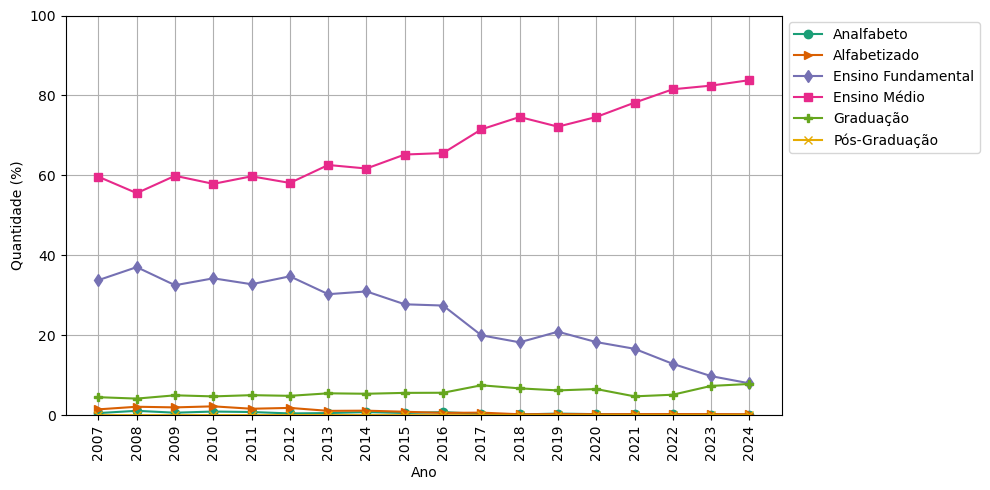

In [51]:
fig, ax = plt.subplots(figsize=(10, 5))

marcadores = ['o', '>', 'd', 's', 'P', 'x']
cores = plt.get_cmap('Dark2').colors

for (nivel_educacional, grupo), marcador, cor in zip(df_edu.group_by('nivel_educacional', maintain_order=True), marcadores, cores):
    ax.plot(
        grupo.select('vinculacao_ano'),
        grupo.select('qtd_pct'),
        label=nivel_educacional,
        marker=marcador,
        color=cor
    )

ax.tick_params('x', rotation=90)
ax.set_xticks(anos)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.grid()
ax.set_ylim(0, 100)
ax.set_ylabel('Quantidade (%)')
ax.set_xlabel('Ano')

plt.tight_layout()
fig.savefig('historico_nivel_educacional_alistados.png', dpi=300, bbox_inches='tight')
plt.show()

In [52]:
df.head()

ano_nascimento,uf_nascimento,vinculacao_ano,zona_residencial,uf_residencia,convocacao,nivel_educacional
i16,cat,i16,cat,cat,bool,enum
1989,"""SP""",2007,"""Urbana""","""SP""",true,"""Ensino Médio"""
1989,"""SP""",2007,"""Urbana""","""SP""",true,"""Ensino Médio"""
1989,"""SP""",2007,"""Urbana""","""SP""",true,"""Ensino Médio"""
1989,"""SP""",2007,"""Urbana""","""SP""",true,"""Ensino Médio"""
1989,"""SP""",2007,"""Urbana""","""SP""",true,"""Ensino Médio"""


In [53]:
df_convocacao = df.group_by('vinculacao_ano', 'convocacao').agg(
    qtd = pl.len()
).with_columns(
    qtd_pct = ((pl.col('qtd') / pl.col('qtd').sum().over('vinculacao_ano')) * 100).round(2)
).sort('vinculacao_ano', descending=False)

In [54]:
df_convocacao.head()

vinculacao_ano,convocacao,qtd,qtd_pct
i16,bool,u32,f64
2007,true,533928,33.99
2007,false,1036853,66.01
2008,true,520938,31.17
2008,false,1150411,68.83
2009,false,963815,64.67


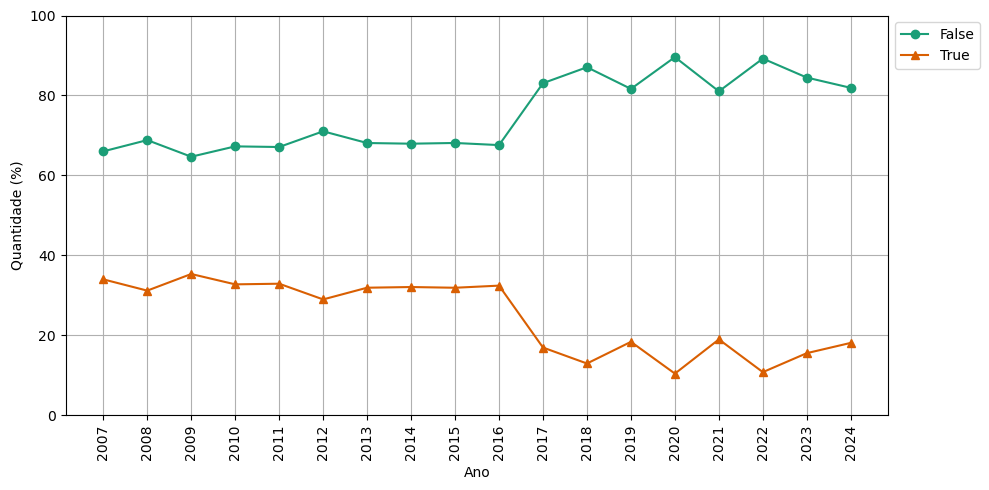

In [55]:
fig, ax = plt.subplots(figsize=(10, 5))

marcadores = ['o', '^']
cores = plt.get_cmap('Dark2').colors

for (convocacao, grupo), marcador, cor in zip(df_convocacao.group_by('convocacao'), marcadores, cores):
    plt.plot(
        grupo.select('vinculacao_ano'),
        grupo.select('qtd_pct'),
        label=convocacao,
        marker=marcador,
        color=cor
    )

ax.tick_params('x', rotation=90)
ax.set_xticks(anos)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.grid()
ax.set_ylim(0, 100)
ax.set_ylabel('Quantidade (%)')
ax.set_xlabel('Ano')

plt.tight_layout()
fig.savefig('historico_alistados_convocados_dispensados.png', dpi=300, bbox_inches='tight')
plt.show()

In [56]:
df.head()

ano_nascimento,uf_nascimento,vinculacao_ano,zona_residencial,uf_residencia,convocacao,nivel_educacional
i16,cat,i16,cat,cat,bool,enum
1989,"""SP""",2007,"""Urbana""","""SP""",true,"""Ensino Médio"""
1989,"""SP""",2007,"""Urbana""","""SP""",true,"""Ensino Médio"""
1989,"""SP""",2007,"""Urbana""","""SP""",true,"""Ensino Médio"""
1989,"""SP""",2007,"""Urbana""","""SP""",true,"""Ensino Médio"""
1989,"""SP""",2007,"""Urbana""","""SP""",true,"""Ensino Médio"""


In [57]:
df_zonaresidencia = df.group_by(['vinculacao_ano', 'zona_residencial']).agg(
    qtd = pl.len()
).with_columns(
    qtd_pct = ((pl.col('qtd') / pl.col('qtd').sum().over('vinculacao_ano')) * 100).round(2)
).sort('vinculacao_ano', descending=False)

In [58]:
df_zonaresidencia.head()

vinculacao_ano,zona_residencial,qtd,qtd_pct
i16,cat,u32,f64
2007,"""Urbana""",1366421,86.99
2007,"""Rural""",204360,13.01
2008,"""Rural""",264390,15.82
2008,"""Urbana""",1406959,84.18
2009,"""Rural""",160463,10.77


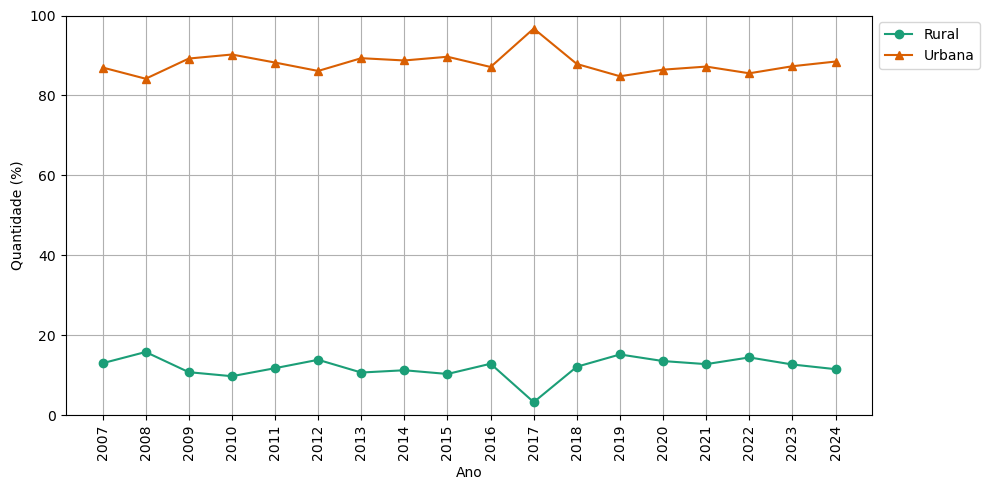

In [59]:
fig, ax = plt.subplots(figsize=(10, 5))

marcadores = ['o', '^']
cores = plt.get_cmap('Dark2').colors

for (zona_residencial, grupo), marcador, cor in zip(df_zonaresidencia.group_by('zona_residencial'), marcadores, cores):
    plt.plot(
        grupo.select('vinculacao_ano'),
        grupo.select('qtd_pct'),
        label=zona_residencial,
        marker=marcador,
        color=cor
    )

ax.tick_params('x', rotation=90)
ax.set_xticks(anos)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.grid()
ax.set_ylim(0, 100)
ax.set_ylabel('Quantidade (%)')
ax.set_xlabel('Ano')

plt.tight_layout()
fig.savefig('historico_zona_residencial_alistados.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# UF_NASCIMENTO

In [ ]:
# UF_RESIDENCIA

In [ ]:
# QTD ALISTADOS POR ANO

## ANÁLISE BIVARIADAS

In [60]:
df.head()

ano_nascimento,uf_nascimento,vinculacao_ano,zona_residencial,uf_residencia,convocacao,nivel_educacional
i16,cat,i16,cat,cat,bool,enum
1989,"""SP""",2007,"""Urbana""","""SP""",true,"""Ensino Médio"""
1989,"""SP""",2007,"""Urbana""","""SP""",true,"""Ensino Médio"""
1989,"""SP""",2007,"""Urbana""","""SP""",true,"""Ensino Médio"""
1989,"""SP""",2007,"""Urbana""","""SP""",true,"""Ensino Médio"""
1989,"""SP""",2007,"""Urbana""","""SP""",true,"""Ensino Médio"""


## ANÁLISE MULTIVARIAVADA

In [61]:
df.head()

ano_nascimento,uf_nascimento,vinculacao_ano,zona_residencial,uf_residencia,convocacao,nivel_educacional
i16,cat,i16,cat,cat,bool,enum
1989,"""SP""",2007,"""Urbana""","""SP""",true,"""Ensino Médio"""
1989,"""SP""",2007,"""Urbana""","""SP""",true,"""Ensino Médio"""
1989,"""SP""",2007,"""Urbana""","""SP""",true,"""Ensino Médio"""
1989,"""SP""",2007,"""Urbana""","""SP""",true,"""Ensino Médio"""
1989,"""SP""",2007,"""Urbana""","""SP""",true,"""Ensino Médio"""


# ML: CLUSTERIZAÇÃO